In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Note: you may need to restart the kernel to use updated packages.


In [6]:
data=pd.read_csv('Train_dataset.csv')
data.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [4]:
Total=data.isnull().sum().sort_values(ascending=False)  
Total
percent=(data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
percent
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])    
missing_data

#['Value Deals Rating','Comedy Gigs Rating','Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient','Instagram Popularity Quotient','Resturant Tie','Ambience']

,Total,Percent
Live Sports Rating,3288,94.131119
Value Deals Rating,2707,77.497853
Comedy Gigs Rating,2483,71.085027
Live Music Rating,765,21.900945
Overall Restaurant Rating,212,6.069281
Facebook Popularity Quotient,99,2.834240
Instagram Popularity Quotient,56,1.603206
Resturant Tier,49,1.402806
Ambience,25,0.715717
Situated in a Multi Complex,0,0.000000


In [8]:
data['Restaurant Theme'].astype(np.number)

ValueError: could not convert string to float: 'Arabian'

In [7]:
data['Opening Day of Restaurant'] = pd.to_datetime(data['Opening Day of Restaurant'])
data['year'] = data['Opening Day of Restaurant'].dt.year

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Facebook Popularity Quotient   3394 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3437 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-null   i

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


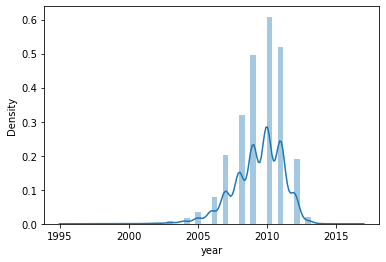

In [45]:
sns.distplot(data['year'])
plt.show()

In [50]:
data.year.nunique()

17

In [68]:
data.head(2)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,year,OpeningState
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,84.3,Not Specific,95.8,1,1,...,NaN,NaN,NaN,8.0,8,6,6,6,2009,<built-in function empty>
1,60002,50000000,"indian,irish",Indore,Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,...,4.0,NaN,NaN,5.0,7,7,3,8,2008,<built-in function empty>


In [34]:
#data['Opening Day of Restaurant']


In [9]:
data.memory_usage()

Index                              128
Registration Number              27944
Annual Turnover                  27944
Cuisine                          27944
City                             27944
Restaurant Location              27944
Opening Day of Restaurant        27944
Facebook Popularity Quotient     27944
Endorsed By                      27944
Instagram Popularity Quotient    27944
Fire Audit                       27944
Liquor License Obtained          27944
Situated in a Multi Complex      27944
Dedicated Parking                27944
Open Sitting Available           27944
Resturant Tier                   27944
Restaurant Type                  27944
Restaurant Theme                 27944
Restaurant Zomato Rating         27944
Restaurant City Tier             27944
Order Wait Time                  27944
Staff Responsivness              27944
Value for Money                  27944
Hygiene Rating                   27944
Food Rating                      27944
Overall Restaurant Rating

In [61]:
#data=data.drop(columns=['Live Sports Rating','Value Deals Rating','Comedy Gigs Rating'],axis=0)
#data=data.drop(columns=['Opening Day of Restaurant'],axis=0)#'Live Sports Rating',
#data=data.drop(columns=['Cuisine'],axis=0)
#data=data.drop(columns=['City'],axis=0)
#data=data.drop(columns=['Live Music Rating'],axis=0)
#data=data.drop(columns=['Comedy Gigs Rating'],axis=0)
#data=data.drop(columns=['Value Deals Rating'],axis=0)
#data=data.drop(columns=['Live Sports Rating'],axis=0)


In [70]:
data['Cuisine'].unique()

array(['indian,irish', 'tibetan,italian', 'turkish,nigerian',
       'irish,belgian', 'tibetan,greek', 'chinese,salvadorian',
       'algerian,belgian', 'welsh,thai', 'peruvian,cuban',
       'japanese,thai', 'british,japanese', 'nigerian,cajun',
       'algerian,algerian', 'polish,jewish', 'cuban,british',
       'algerian,korean', 'swedish,greek', 'turkish,sapnish',
       'british,belgian', 'hawaiian,latvian'], dtype=object)

In [26]:
data.head(2)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,7,10.0,4.0,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,8,9.0,NaN,4.0,NaN,5.0,7,7,3,8


In [10]:
df_missing_values = data[['Value Deals Rating','Comedy Gigs Rating','Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient','Instagram Popularity Quotient','Resturant Tier','Ambience']]
df_missing_values

,Value Deals Rating,Comedy Gigs Rating,Live Music Rating,Overall Restaurant Rating,Facebook Popularity Quotient,Instagram Popularity Quotient,Resturant Tier,Ambience
0,NaN,NaN,4.0,10.0,84.30,95.80,2.0,8.0
1,NaN,4.0,NaN,9.0,85.40,85.00,2.0,5.0
2,NaN,NaN,3.0,8.0,85.00,68.20,2.0,7.0
3,NaN,NaN,6.0,9.0,85.60,83.60,1.0,7.0
4,NaN,2.0,NaN,6.0,NaN,76.80,NaN,NaN
...,...,...,...,...,...,...,...,...
3488,NaN,NaN,5.0,9.0,69.10,62.11,2.0,7.0
3489,NaN,NaN,4.0,NaN,91.00,96.30,2.0,4.0
3490,NaN,NaN,NaN,8.0,80.83,86.80,2.0,6.0
3491,NaN,2.0,3.0,7.0,79.40,86.00,2.0,7.0


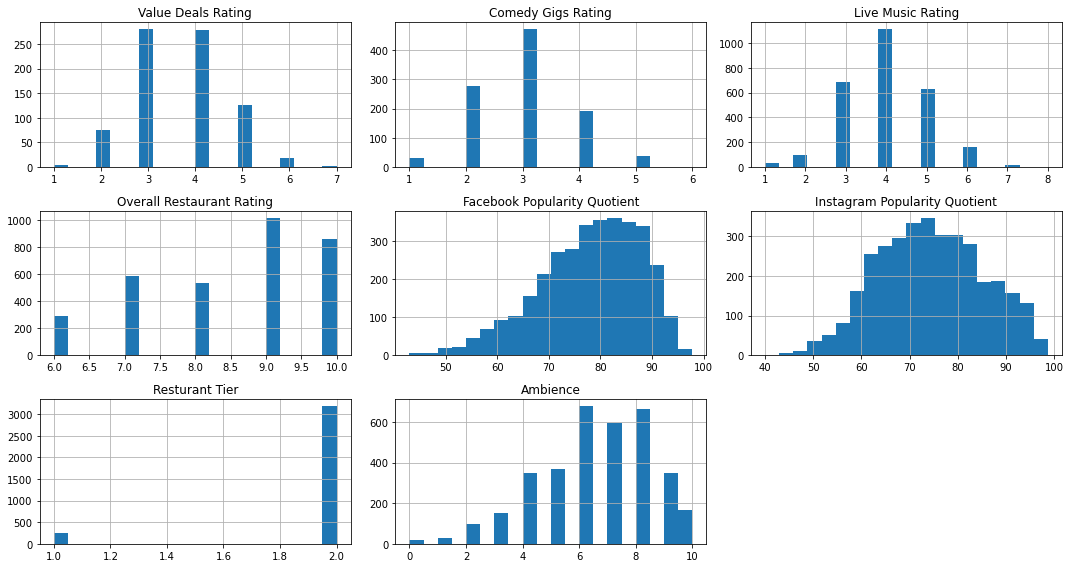

In [29]:
df_missing_values.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [48]:
#['Value Deals Rating','Comedy Gigs Rating','Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient',
 #'Instagram Popularity Quotient','Resturant Tie','Ambience']
#data['Value Deals Rating']=data['Value Deals Rating'].fillna(data['Value Deals Rating'].median())
#data['Comedy Gigs Rating']=data['Comedy Gigs Rating'].fillna(data['Comedy Gigs Rating'].median())
#data['Live Music Rating']=data['Live Music Rating'].fillna(data['Live Music Rating'].median())
data['Overall Restaurant Rating']=data['Overall Restaurant Rating'].fillna(data['Overall Restaurant Rating'].median())
data['Facebook Popularity Quotient']=data['Facebook Popularity Quotient'].fillna(data['Facebook Popularity Quotient'].median())
data['Instagram Popularity Quotient']=data['Instagram Popularity Quotient'].fillna(data['Instagram Popularity Quotient'].median())
data['Resturant Tier']=data['Resturant Tier'].fillna(data['Resturant Tier'].median())
data['Ambience']=data['Ambience'].fillna(data['Ambience'].median())

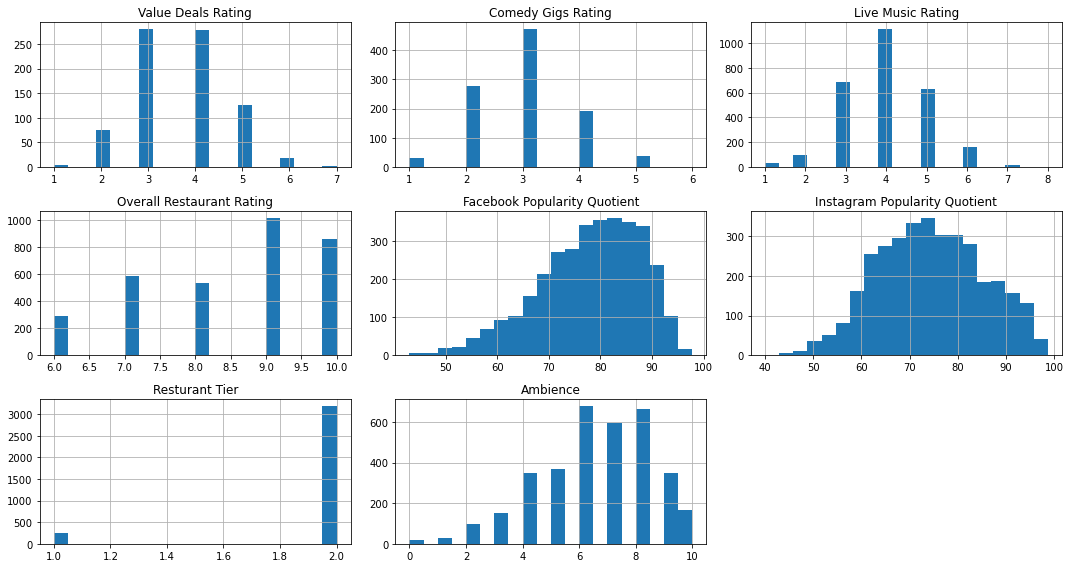

In [73]:
df_missing_values.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


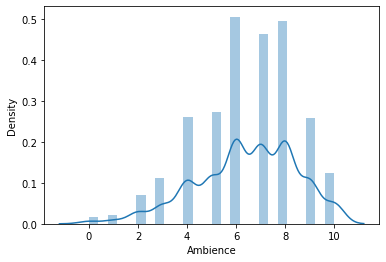

In [74]:
sns.distplot(data['Ambience'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x360 with 0 Axes>

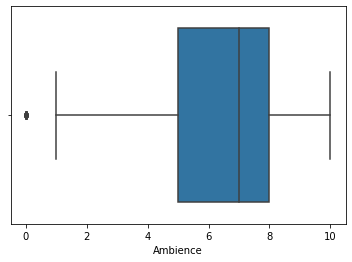

<Figure size 360x360 with 0 Axes>

In [76]:
sns.boxplot(data['Ambience'])
plt.figure(figsize=(5,5))

In [35]:
data.describe(include = ['object'])

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Endorsed By,Restaurant Type,Restaurant Theme
count,3493,3493,3493,3493,3493,3493,3493
unique,20,297,2,1778,3,4,34
top,"tibetan,greek",Bangalore,Near Party Hub,27-12-2009,Not Specific,Bar,Arabian
freq,686,553,2658,10,1961,3235,1373


In [22]:
data['Restaurant Location'] = pd.get_dummies(data = data['Restaurant Location'], drop_first=True)

In [23]:
data['Endorsed By'] = pd.get_dummies(data = data['Endorsed By'], drop_first=True)

In [24]:
data['Restaurant Type'] = pd.get_dummies(data = data['Restaurant Type'], drop_first=True)

In [31]:
data['Cuisine'] = pd.get_dummies(data = data['Cuisine'], drop_first=True)

In [25]:
data['Restaurant Theme'] = pd.get_dummies(data = data['Restaurant Theme'], drop_first=True)

In [32]:
data['City'] = pd.get_dummies(data = data['City'], drop_first=True)

In [33]:
X=data.drop(columns=['Annual Turnover'],axis=0)

In [34]:
y=data['Annual Turnover']

In [35]:
X=sm.add_constant(X)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=1,test_size = 0.2)

NameError: name 'select_dtypes' is not defined

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   const                          3493 non-null   float64       
 1   Registration Number            3493 non-null   int64         
 2   Cuisine                        3493 non-null   uint8         
 3   City                           3493 non-null   uint8         
 4   Restaurant Location            3493 non-null   uint8         
 5   Opening Day of Restaurant      3493 non-null   datetime64[ns]
 6   Facebook Popularity Quotient   3394 non-null   float64       
 7   Endorsed By                    3493 non-null   uint8         
 8   Instagram Popularity Quotient  3437 non-null   float64       
 9   Fire Audit                     3493 non-null   int64         
 10  Liquor License Obtained        3493 non-null   int64         
 11  Situated in a Mul

In [63]:
pred_model=sm.OLS(y_train,x_train).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [18]:
print(pred_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual Turnover   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     18.49
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.68e-80
Time:                        06:36:53   Log-Likelihood:                -50607.
No. Observations:                2794   AIC:                         1.013e+05
Df Residuals:                    2766   BIC:                         1.014e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [136]:
columns=['','','','','']

const                            3.675047e-29
Registration Number              3.793289e-01
Restaurant Location              4.468267e-03
Facebook Popularity Quotient     3.711678e-03
Endorsed By                      9.556906e-01
Instagram Popularity Quotient    1.456027e-06
Fire Audit                       3.477799e-02
Liquor License Obtained          1.695908e-01
Situated in a Multi Complex      7.872702e-04
Dedicated Parking                2.787133e-02
Open Sitting Available           7.126535e-01
Resturant Tier                   3.887942e-09
Restaurant Type                  4.711995e-01
Restaurant Theme                 5.300842e-01
Restaurant Zomato Rating         3.756175e-03
Restaurant City Tier             2.478835e-02
Order Wait Time                  6.415809e-01
Staff Responsivness              1.137016e-03
Value for Money                  4.480008e-02
Hygiene Rating                   4.884875e-04
Food Rating                      3.805876e-02
Overall Restaurant Rating        2

In [64]:
linreg=LinearRegression()

In [66]:
MLR_model = linreg.fit(y_train,x_train)

ValueError: Expected 2D array, got 1D array instead:
array=[24500000 12000000 21000000 ... 35000000 12000000 30000000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
train_pred = MLR_model.predict(x_train)

In [22]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  17780777.6449


In [77]:
#Ridge Regression
ridge = Ridge(alpha = 11)
ridge_model = ridge.fit(x_train, y_train)

In [78]:
#Ridge Regression
#For Train Data
train_pred = ridge_model.predict(x_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
#For Test Data
test_pred = ridge_model.predict(x_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  17784175.0643
Root Mean Squared Error (RMSE) on test set:  27746125.8096


In [79]:
#Lasso Regression
lasso = Lasso(alpha = 11)
lasso_model = lasso.fit(x_train, y_train) 
train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
test_pred = lasso_model.predict(x_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  17780777.6645
Root Mean Squared Error (RMSE) on test set:  27739094.1406


In [ ]:
#Feature Engineering Forward Selection

In [66]:
lin_forward=sfs(estimator=linreg,k_features='best',forward=True,scoring='r2')
sfs_forward = lin_forward.fit(x_train, y_train)
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)
# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
 ('const', 'Restaurant Location', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Resturant Tier', 'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Ambience', 'Lively', 'year')

R-squared:  0.14226448094356792


In [67]:
lin_backward=sfs(estimator=linreg,k_features='best',forward=False,scoring='r2')
sfs_backward = lin_backward.fit(x_test, y_test)
print('Features selelected using Backward selection are: \n',sfs_backward.k_feature_names_)
# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using Backward selection are: 
 ('const', 'Instagram Popularity Quotient', 'Liquor License Obtained', 'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Ambience', 'Lively', 'Comfortablility', 'year')

R-squared:  0.07944573489897278


In [64]:
#Variation Inflation Factor
vif = pd.DataFrame()
vif["Features"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
# print the VIF
print(vif)

                         Features          VIF
0             Registration Number  3764.682621
1                 Annual Turnover     3.339402
2             Restaurant Location     4.602076
3    Facebook Popularity Quotient   124.584919
4                     Endorsed By     2.795969
5   Instagram Popularity Quotient    89.179322
6                      Fire Audit     4.759918
7         Liquor License Obtained    88.055974
8     Situated in a Multi Complex     5.257881
9               Dedicated Parking     5.098139
10         Open Sitting Available     5.025533
11                 Resturant Tier    64.238624
12                Restaurant Type     1.016900
13               Restaurant Theme     1.006534
14       Restaurant Zomato Rating    15.531310
15           Restaurant City Tier     1.509574
16                Order Wait Time     4.757149
17            Staff Responsivness    26.185261
18                Value for Money    37.991848
19                 Hygiene Rating    22.526606
20           

In [70]:
#Cross Validation Used here , other validation method are KFold,Leave one out
scores = cross_val_score(estimator = LinearRegression(),X = x_train,y = y_train,cv = 2,scoring = 'r2',)
print('All scores: ', scores)   
print("\nMinimum score obtained: ", round(min(scores), 4))  
print("Maximum score obtained: ", round(max(scores), 4))    
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.10451232 0.14558485]

Minimum score obtained:  0.1045
Maximum score obtained:  0.1456
Average score obtained:  0.125


In [76]:
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 11}


In [ ]:
#Removing significance value
#Removing Ambience for second round

In [138]:

less_sig_column=['Ambience','Restaurant Location','Facebook Popularity Quotient','Instagram Popularity Quotient','Situated in a Multi Complex','Resturant Tier','Restaurant Zomato Rating','Staff Responsivness','Hygiene Rating','year']

In [173]:
data1=data.drop(data['Ambience'],axis=0)

In [142]:
data1.head()

,Registration Number,Annual Turnover,Endorsed By,Fire Audit,Liquor License Obtained,Dedicated Parking,Open Sitting Available,Restaurant Type,Restaurant Theme,Restaurant City Tier,Order Wait Time,Value for Money,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,1,1,1,0,1,0,0,0,2,5,7,10.0,8.0,8,6,6,6
1,60002,50000000,0,1,1,1,0,0,0,0,6,6,8,9.0,5.0,7,7,3,8
2,60003,32500000,0,1,1,1,0,0,0,0,2,5,7,8.0,7.0,10,5,2,8
3,60004,110000000,0,0,1,1,1,0,0,1,7,5,8,9.0,7.0,7,4,3,5
4,60005,20000000,0,1,1,1,1,0,0,0,10,6,8,6.0,7.0,6,2,4,6


In [174]:
X=data1.drop(columns=['Annual Turnover'],axis=0)
y=data1['Annual Turnover']

In [175]:
x_train_l1,x_test_l1,y_train_l1,y_test_l1=train_test_split(X,y, random_state=1,test_size = 0.2)
pred_model_l1=sm.OLS(y_train_l1,x_train_l1).fit()
print(pred_model_l1.summary())

                                 OLS Regression Results                                
Dep. Variable:        Annual Turnover   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              219.1
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        09:36:41   Log-Likelihood:                         -50993.
No. Observations:                2785   AIC:                                  1.020e+05
Df Residuals:                    2758   BIC:                                  1.022e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [176]:
train_pred_l1 = pred_model_l1.predict(x_train_l1)
mse_train = mean_squared_error(y_train_l1, train_pred_l1)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  21656595.7749


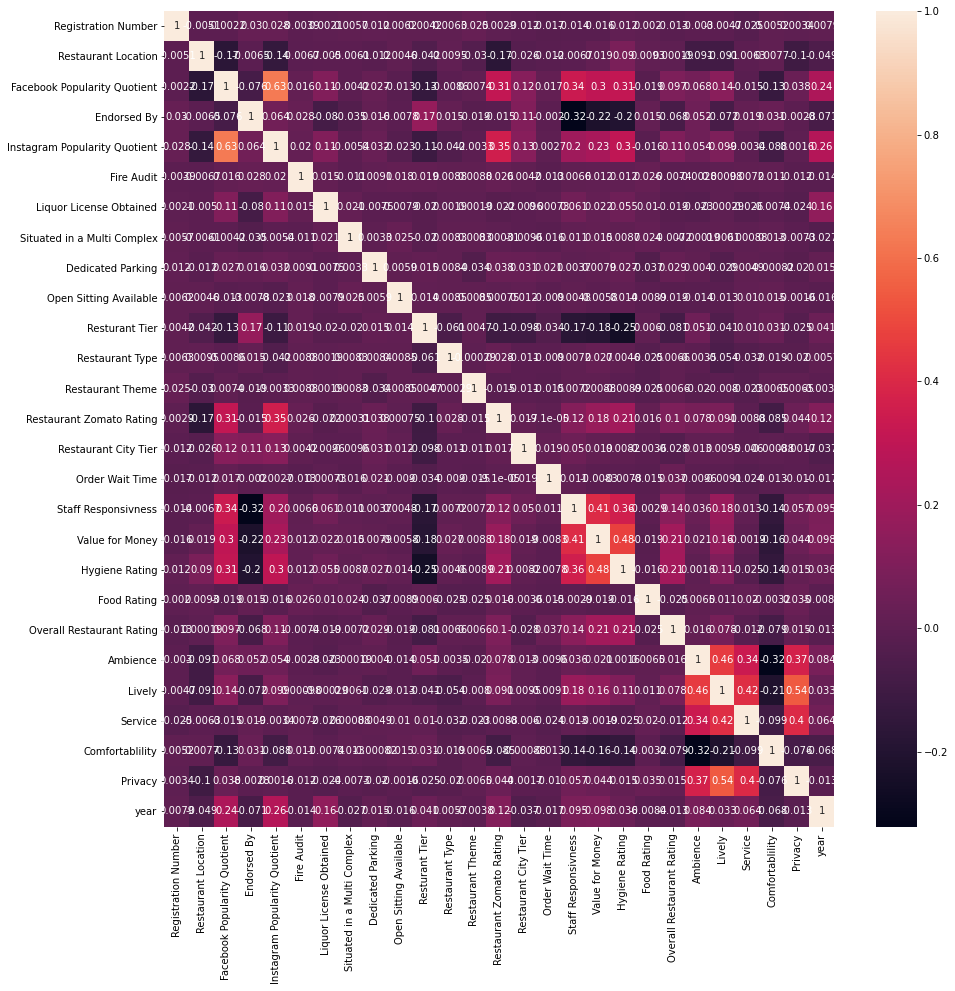

In [177]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(X.corr(),annot=True,ax=ax)
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ambience', ylabel='Density'>

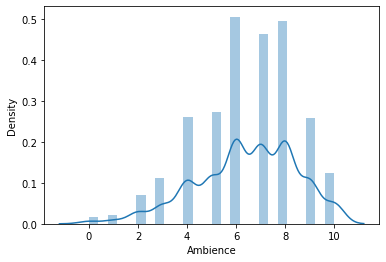

In [171]:
sns.distplot(X['Ambience'])#Ambience,Value for Money,Endorsed By

In [4]:
pip install auto-sklearn

  Using cached auto-sklearn-0.12.6.tar.gz (6.1 MB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\AS20188795\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\AS20188795\\AppData\\Local\\Temp\\pip-install-30s58sh2\\auto-sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\AS20188795\\AppData\\Local\\Temp\\pip-install-30s58sh2\\auto-sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\AS20188795\AppData\Local\Temp\pip-pip-egg-info-g1fg70z0'
         cwd: C:\Users\AS20188795\AppData\Local\Temp\pip-install-30s58sh2\auto-sklearn\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\AS20188795\AppData\Local\Temp\pip-install-30s58sh2\auto-sklearn\setup.py", line 9, in <module>
        raise ValueError(
    ValueError: Detected unsupported op